Exercice 3 p198


A) k-fold validation is implemented by splitting the data set into k different sets. k-1 sets are used as training sets and the last one is used as a test set. To get the accuracy we calculate the average of all the training sets

B) i) high sensitivity to outliers and higher results on test set than reality.
    ii) very high computational needs as there are k = n folds. 

Exercice 5 p 200

In [9]:
library(boot)

In [4]:
set.seed(1)
y = rnorm(100)
x = rnorm(100)
y = x - 2 * x^2 + rnorm(100) # n=100 & p=2

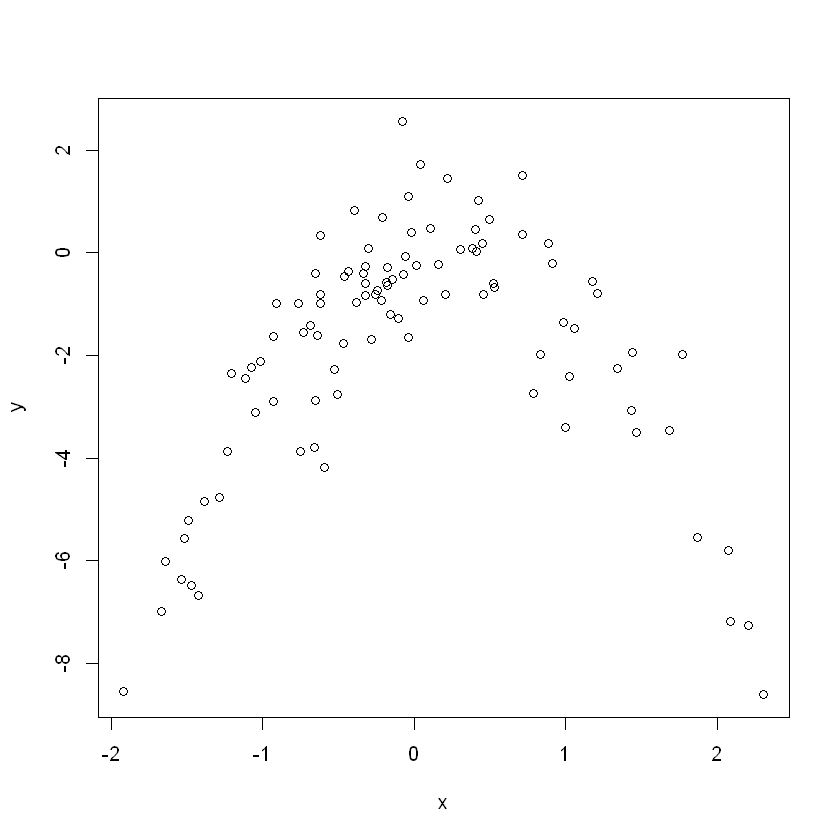

In [7]:
plot(x, y)

y is highest for x = 0 and gets lower towards -2 and 2 

In [12]:
Data = data.frame(x, y)
set.seed(1)

In [13]:
glm.fit = glm(y ~ x)
cv.glm(Data, glm.fit)$delta

[1] 5.890979 5.888812

In [14]:
glm.fit = glm(y ~ poly(x, 2))
cv.glm(Data, glm.fit)$delta

[1] 1.086596 1.086326

In [15]:
glm.fit = glm(y ~ poly(x, 3))
cv.glm(Data, glm.fit)$delta

[1] 1.102585 1.102227

In [16]:
glm.fit = glm(y ~ poly(x, 4))
cv.glm(Data, glm.fit)$delta

[1] 1.114772 1.114334

In [24]:
set.seed(2)

glm.fit = glm(y ~ x)
cv.glm(Data, glm.fit)$delta

glm.fit = glm(y ~ poly(x, 2))
cv.glm(Data, glm.fit)$delta

glm.fit = glm(y ~ poly(x, 3))
cv.glm(Data, glm.fit)$delta

glm.fit = glm(y ~ poly(x, 4))
cv.glm(Data, glm.fit)$delta

[1] 5.890979 5.888812

[1] 1.086596 1.086326

[1] 1.102585 1.102227

[1] 1.114772 1.114334

same results 

the quadratic equation had the best results because it matches Y 

In [26]:
summary(glm.fit)


Call:
glm(formula = y ~ poly(x, 4))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8914  -0.5244   0.0749   0.5932   2.7796  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.8277     0.1041 -17.549   <2e-16 ***
poly(x, 4)1   2.3164     1.0415   2.224   0.0285 *  
poly(x, 4)2 -21.0586     1.0415 -20.220   <2e-16 ***
poly(x, 4)3  -0.3048     1.0415  -0.293   0.7704    
poly(x, 4)4  -0.4926     1.0415  -0.473   0.6373    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 1.084654)

    Null deviance: 552.21  on 99  degrees of freedom
Residual deviance: 103.04  on 95  degrees of freedom
AIC: 298.78

Number of Fisher Scoring iterations: 2


poly1 & 2 are significant which is related to the quadratic form of the function Y 

Exercice 1 p 259:

a) Best subset selection

b) Best subset selection

C) i.true
ii.true
iii.false
iv.false 
v.false

Exercice 9 p 263:

In [38]:
library(glmnet)

Loading required package: Matrix

Loaded glmnet 4.1-2



In [28]:
library(ISLR)

In [47]:
set.seed(11)

In [48]:
head(College)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


In [49]:
 n = dim(College)[1] 

In [54]:
train.size = n / 2

In [55]:
train = sample(1:dim(College)[1], train.size)
test = -train
College.train = College[train, ]
College.test = College[test, ]

In [56]:
lm.fit = lm(Apps~., data=College.train)
lm.pred = predict(lm.fit, College.test)
mean((College.test[, "Apps"] - lm.pred)^2)

[1] 1218838

In [57]:
train.mat = model.matrix(Apps~., data=College.train)
test.mat = model.matrix(Apps~., data=College.test)
grid = 10 ^ seq(4, -2, length=100)
mod.ridge = cv.glmnet(train.mat, College.train[, "Apps"], alpha=0, lambda=grid, thresh=1e-12)
lambda.best = mod.ridge$lambda.min
lambda.best

[1] 0.01

In [58]:
ridge.pred = predict(mod.ridge, newx=test.mat, s=lambda.best)
mean((College.test[, "Apps"] - ridge.pred)^2)

[1] 1218835

In [59]:
mod.lasso = cv.glmnet(train.mat, College.train[, "Apps"], alpha=1, lambda=grid, thresh=1e-12)
lambda.best = mod.lasso$lambda.min
lambda.best

[1] 132.1941

In [60]:
lasso.pred = predict(mod.lasso, newx=test.mat, s=lambda.best)
mean((College.test[, "Apps"] - lasso.pred)^2)

[1] 1300927

In [61]:
mod.lasso = glmnet(model.matrix(Apps~., data=College), College[, "Apps"], alpha=1)
predict(mod.lasso, s=lambda.best, type="coefficients")

19 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept) -716.90277284
(Intercept)    .         
PrivateYes   -92.66060964
Accept         1.38606991
Enroll         .         
Top10perc     23.02501990
Top25perc      .         
F.Undergrad    .         
P.Undergrad    .         
Outstate       .         
Room.Board     .         
Books          .         
Personal       .         
PhD            .         
Terminal       .         
S.F.Ratio      .         
perc.alumni    .         
Expend         0.03656037
Grad.Rate      .         

Exercice 9 p 299:

In [65]:
library(MASS)

In [66]:
attach(Boston)

The following objects are masked from Boston (pos = 3):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad,
    rm, tax, zn




In [67]:
lm.fit = lm(nox ~ poly(dis, 3), data = Boston)
summary(lm.fit)


Call:
lm(formula = nox ~ poly(dis, 3), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.121130 -0.040619 -0.009738  0.023385  0.194904 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.554695   0.002759 201.021  < 2e-16 ***
poly(dis, 3)1 -2.003096   0.062071 -32.271  < 2e-16 ***
poly(dis, 3)2  0.856330   0.062071  13.796  < 2e-16 ***
poly(dis, 3)3 -0.318049   0.062071  -5.124 4.27e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06207 on 502 degrees of freedom
Multiple R-squared:  0.7148,	Adjusted R-squared:  0.7131 
F-statistic: 419.3 on 3 and 502 DF,  p-value: < 2.2e-16


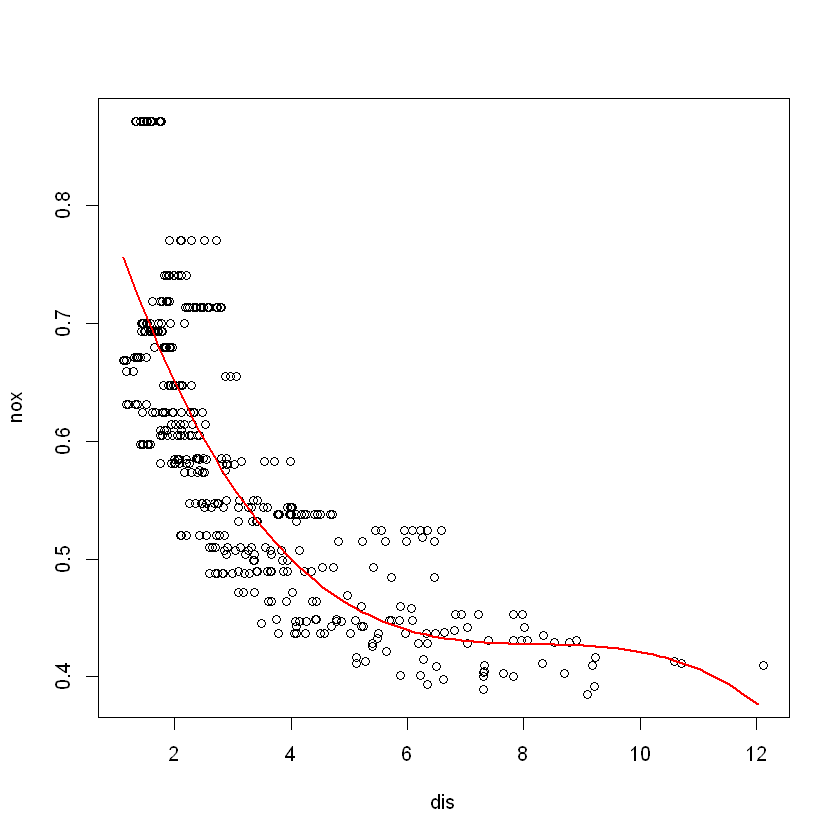

In [69]:
dislim = range(dis)
dis.grid = seq(from = dislim[1], to = dislim[2], by = 0.1)
lm.pred = predict(lm.fit, list(dis = dis.grid))
plot(nox ~ dis, data = Boston, col = "black")
lines(dis.grid, lm.pred, col = "red", lwd = 2)

In [70]:
all.rss = rep(NA, 10)
for (i in 1:10) {
    lm.fit = lm(nox ~ poly(dis, i), data = Boston)
    all.rss[i] = sum(lm.fit$residuals^2)
}
all.rss

[1] 2.768563 2.035262 1.934107 1.932981 1.915290 1.878257 1.849484 1.835630
 [9] 1.833331 1.832171

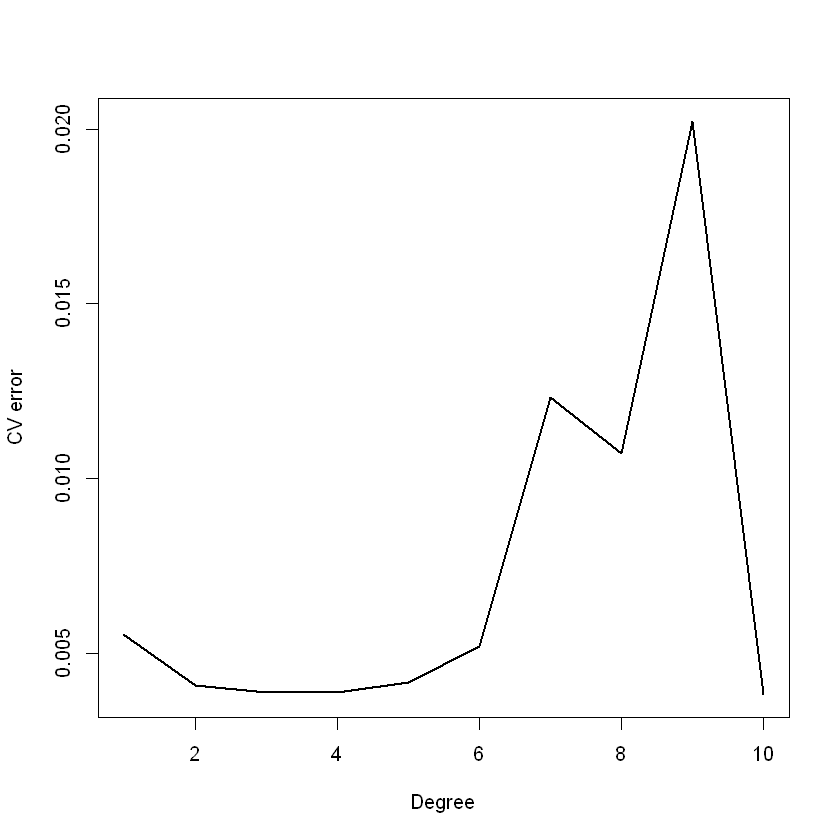

In [71]:
library(boot)
all.deltas = rep(NA, 10)
for (i in 1:10) {
    glm.fit = glm(nox ~ poly(dis, i), data = Boston)
    all.deltas[i] = cv.glm(Boston, glm.fit, K = 10)$delta[2]
}
plot(1:10, all.deltas, xlab = "Degree", ylab = "CV error", type = "l", pch = 20, 
    lwd = 2)

In [72]:
library(splines)
sp.fit = lm(nox ~ bs(dis, df = 4, knots = c(4, 7, 11)), data = Boston)
summary(sp.fit)


Call:
lm(formula = nox ~ bs(dis, df = 4, knots = c(4, 7, 11)), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.124567 -0.040355 -0.008702  0.024740  0.192920 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                            0.73926    0.01331  55.537  < 2e-16 ***
bs(dis, df = 4, knots = c(4, 7, 11))1 -0.08861    0.02504  -3.539  0.00044 ***
bs(dis, df = 4, knots = c(4, 7, 11))2 -0.31341    0.01680 -18.658  < 2e-16 ***
bs(dis, df = 4, knots = c(4, 7, 11))3 -0.26618    0.03147  -8.459 3.00e-16 ***
bs(dis, df = 4, knots = c(4, 7, 11))4 -0.39802    0.04647  -8.565  < 2e-16 ***
bs(dis, df = 4, knots = c(4, 7, 11))5 -0.25681    0.09001  -2.853  0.00451 ** 
bs(dis, df = 4, knots = c(4, 7, 11))6 -0.32926    0.06327  -5.204 2.85e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06185 on 499 degrees of freedom
Multiple R-squared:  0.7185,	Adju

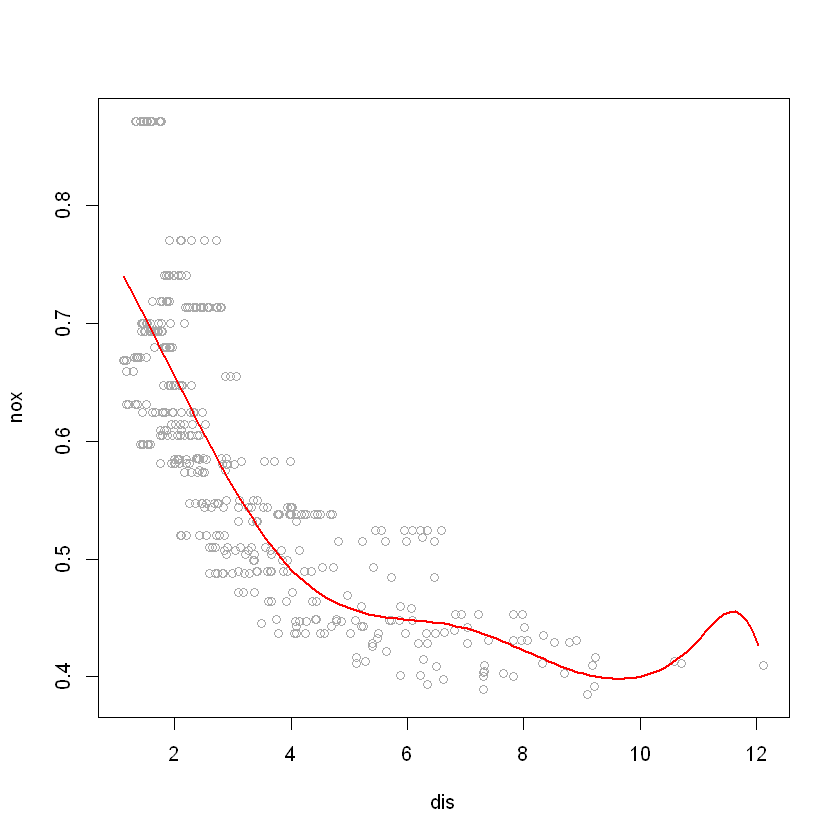

In [73]:
sp.pred = predict(sp.fit, list(dis = dis.grid))
plot(nox ~ dis, data = Boston, col = "darkgrey")
lines(dis.grid, sp.pred, col = "red", lwd = 2)

In [ ]:
Exer